# 트리 알고리즘
- 선으로 표현하기에는 부적합하지만 분류하기에는 성능이 좋은 편이다
- 그래서 특성값을 사실 표준점수로 변환하지 않아도 된다

In [21]:
import pandas as pd

red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

red_wine = red_wine[['alcohol', 'residual sugar', 'pH']]
red_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)
red_wine['class'] = 0 # 책이랑 똑같게 하기 위함

white_wine = white_wine[['alcohol', 'residual sugar', 'pH']]
white_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)
white_wine['class'] = 1 # 책이랑 똑같게 하기 위함

- class 0으로 바꾼건 와인의 정보를 바탕으로 class를 다시 정의하기 위함

In [22]:
wine = pd.concat([red_wine, white_wine])

In [23]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]
from sklearn.model_selection import train_test_split
x_input, y_input, x_target, y_target = train_test_split(data, target)

In [24]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_input)
train_scaled = ss.transform(x_input)
test_scaled = ss.transform(y_input)

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, x_target)
print(lr.score(train_scaled, x_target))
print(lr.score(test_scaled, y_target))

0.7834564860426929
0.7809230769230769


C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 트리화 본격 시작

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, x_target)

print(dt.score(train_scaled, x_target))
print(dt.score(test_scaled, y_target))

0.9969211822660099
0.8658461538461538


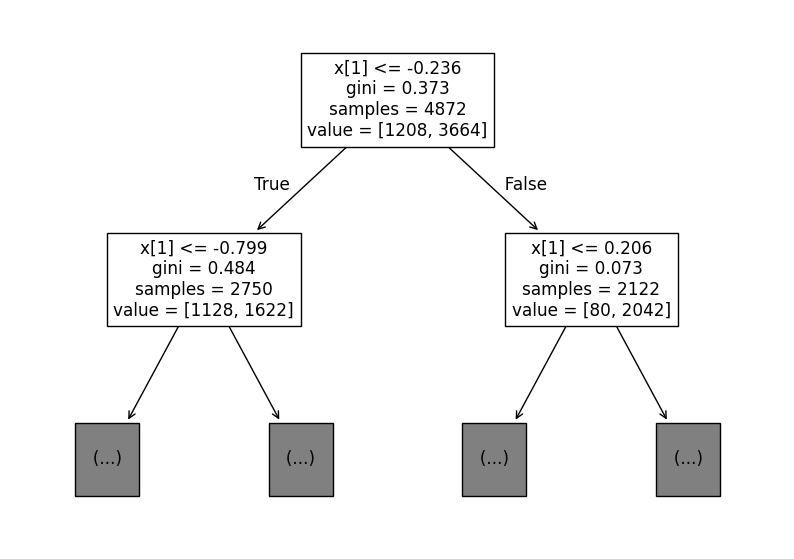

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1) # 보고싶은 값의 일부분은 여기서 조절한다
plt.show()

- x[1] 설탕이라고 한다면 당분함량이 어떤가요 하면서 T/F로 나눈다
- 불순도 : 얼마만큼 데이터가 편향되어있는가. 가장 잘 나누려면 차이가 극명하게 나타나야 해서 5:5로 나와서 0.5에 가까울수록 최악으로 잘못나눈 경우이고 0에 가까울수록 잘 나눈 값
- 총샘플수
- 클래스별 샘플 수

## 가지치기

In [ ]:
max_depth=10 # 하이퍼 파라미터